In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


load the dataset

In [2]:
data=pd.read_csv('/content/website_traffic.csv')
data

,Page Views,Session Duration,Bounce Rate,Traffic Source,Time on Page,Previous Visits,Conversion Rate
0,5,11.051381,0.230652,Organic,3.890460,3,1.0
1,4,3.429316,0.391001,Social,8.478174,0,1.0
2,4,1.621052,0.397986,Organic,9.636170,2,1.0
3,5,3.629279,0.180458,Organic,2.071925,3,1.0
4,5,4.235843,0.291541,Paid,1.960654,5,1.0
...,...,...,...,...,...,...,...
1995,1,2.724513,0.207187,Referral,1.324206,2,1.0
1996,3,0.392856,0.095559,Organic,3.824416,1,1.0
1997,4,9.899823,0.446622,Organic,1.288675,1,1.0
1998,3,0.393319,0.278340,Paid,5.037584,2,1.0


inspect missing values

In [3]:
data.isna().sum()

,0
Page Views,0
Session Duration,0
Bounce Rate,0
Traffic Source,0
Time on Page,0
Previous Visits,0
Conversion Rate,0


The Website traffic dataset has no missing values.

In [4]:
data.head()

,Page Views,Session Duration,Bounce Rate,Traffic Source,Time on Page,Previous Visits,Conversion Rate
0,5,11.051381,0.230652,Organic,3.890460,3,1.0
1,4,3.429316,0.391001,Social,8.478174,0,1.0
2,4,1.621052,0.397986,Organic,9.636170,2,1.0
3,5,3.629279,0.180458,Organic,2.071925,3,1.0
4,5,4.235843,0.291541,Paid,1.960654,5,1.0


convert traffic source into numerical values

In [5]:
data['Traffic Source'].unique()

array(['Organic', 'Social', 'Paid', 'Direct', 'Referral'], dtype=object)

In [6]:
from sklearn import preprocessing
data['Traffic Source']=data['Traffic Source'].astype('str')
le=preprocessing.LabelEncoder()
data['Traffic Source']=le.fit_transform(data['Traffic Source'])
data.head()


,Page Views,Session Duration,Bounce Rate,Traffic Source,Time on Page,Previous Visits,Conversion Rate
0,5,11.051381,0.230652,1,3.890460,3,1.0
1,4,3.429316,0.391001,4,8.478174,0,1.0
2,4,1.621052,0.397986,1,9.636170,2,1.0
3,5,3.629279,0.180458,1,2.071925,3,1.0
4,5,4.235843,0.291541,2,1.960654,5,1.0


Conduct EDA to understand the distribution of variables and their relationships with the target variable Conversion Rate

In [7]:
X=data.drop('Conversion Rate',axis=1)
y=data['Conversion Rate']
print(X.shape)
print(y.shape)

(2000, 6)
(2000,)


Visualize the relationships using scatter plots, pair plots, and correlation matrices.

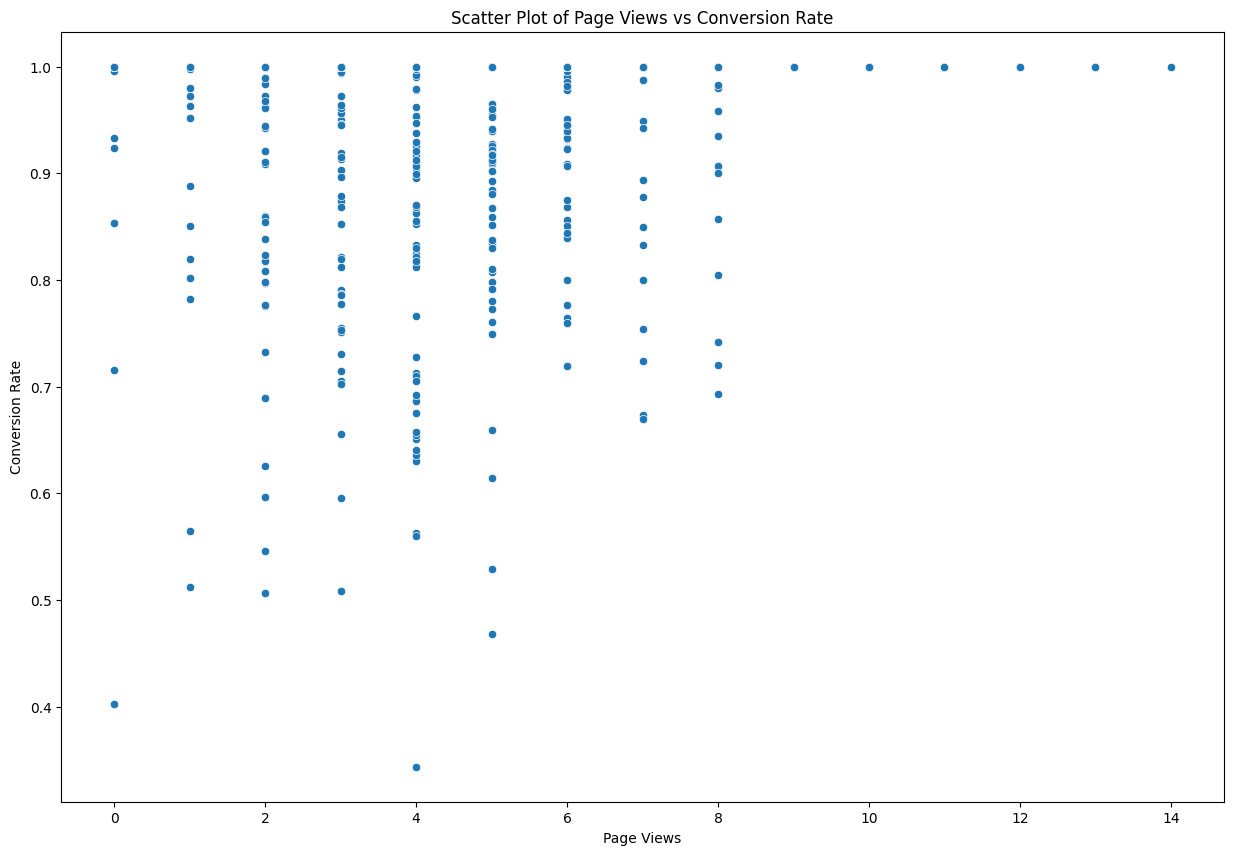

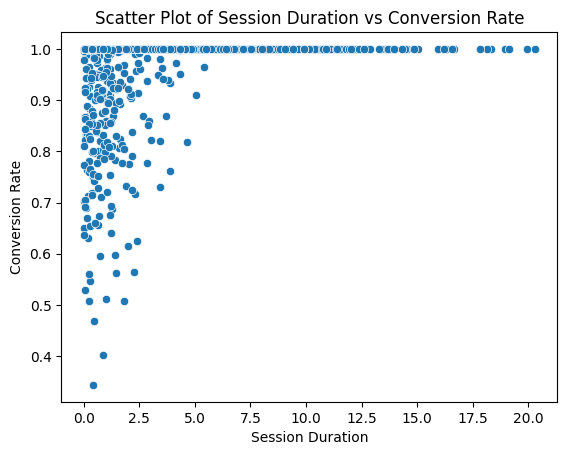

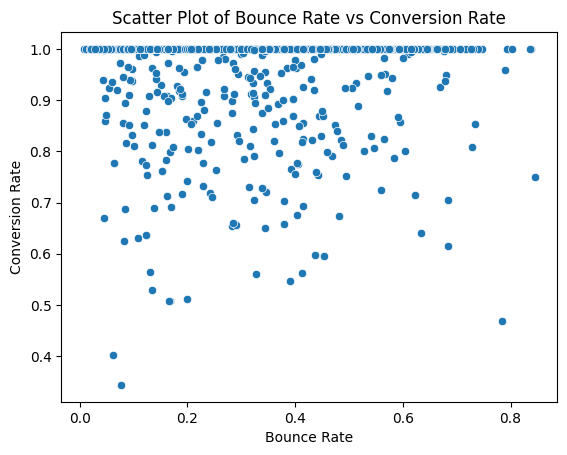

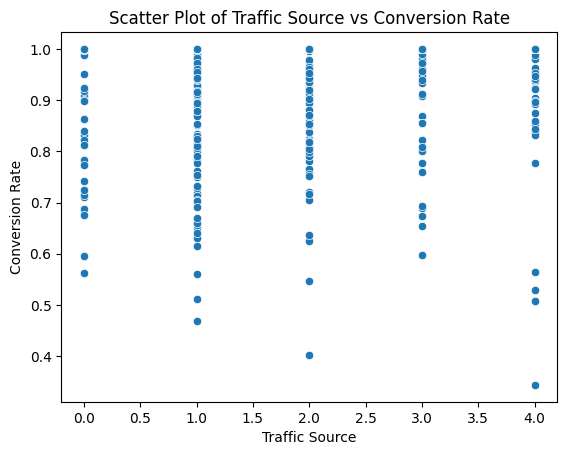

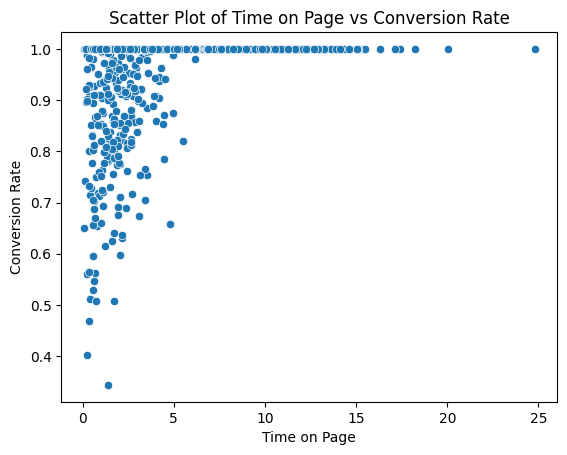

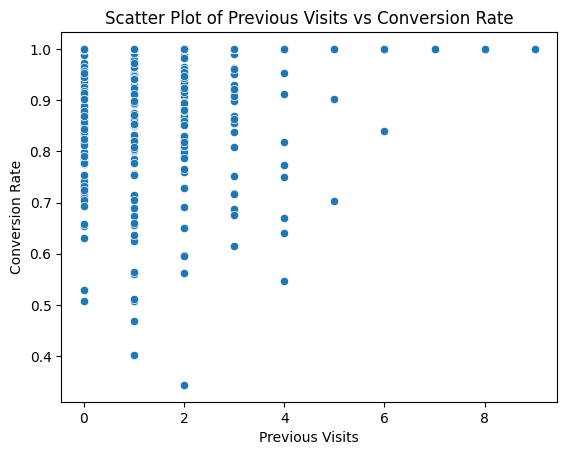

In [8]:
plt.figure(figsize=(15,10))
for column in data.columns:
    if column!='Conversion Rate':
        #plt.scatter(data[column],data['Conversion Rate'])
        plt.xlabel(column)
        plt.ylabel('Conversion Rate')
        plt.title(f'Scatter Plot of {column} vs Conversion Rate')
        sns.scatterplot(data=data,x=column,y='Conversion Rate')
        plt.show()


pairplot

<Figure size 2500x1000 with 0 Axes>

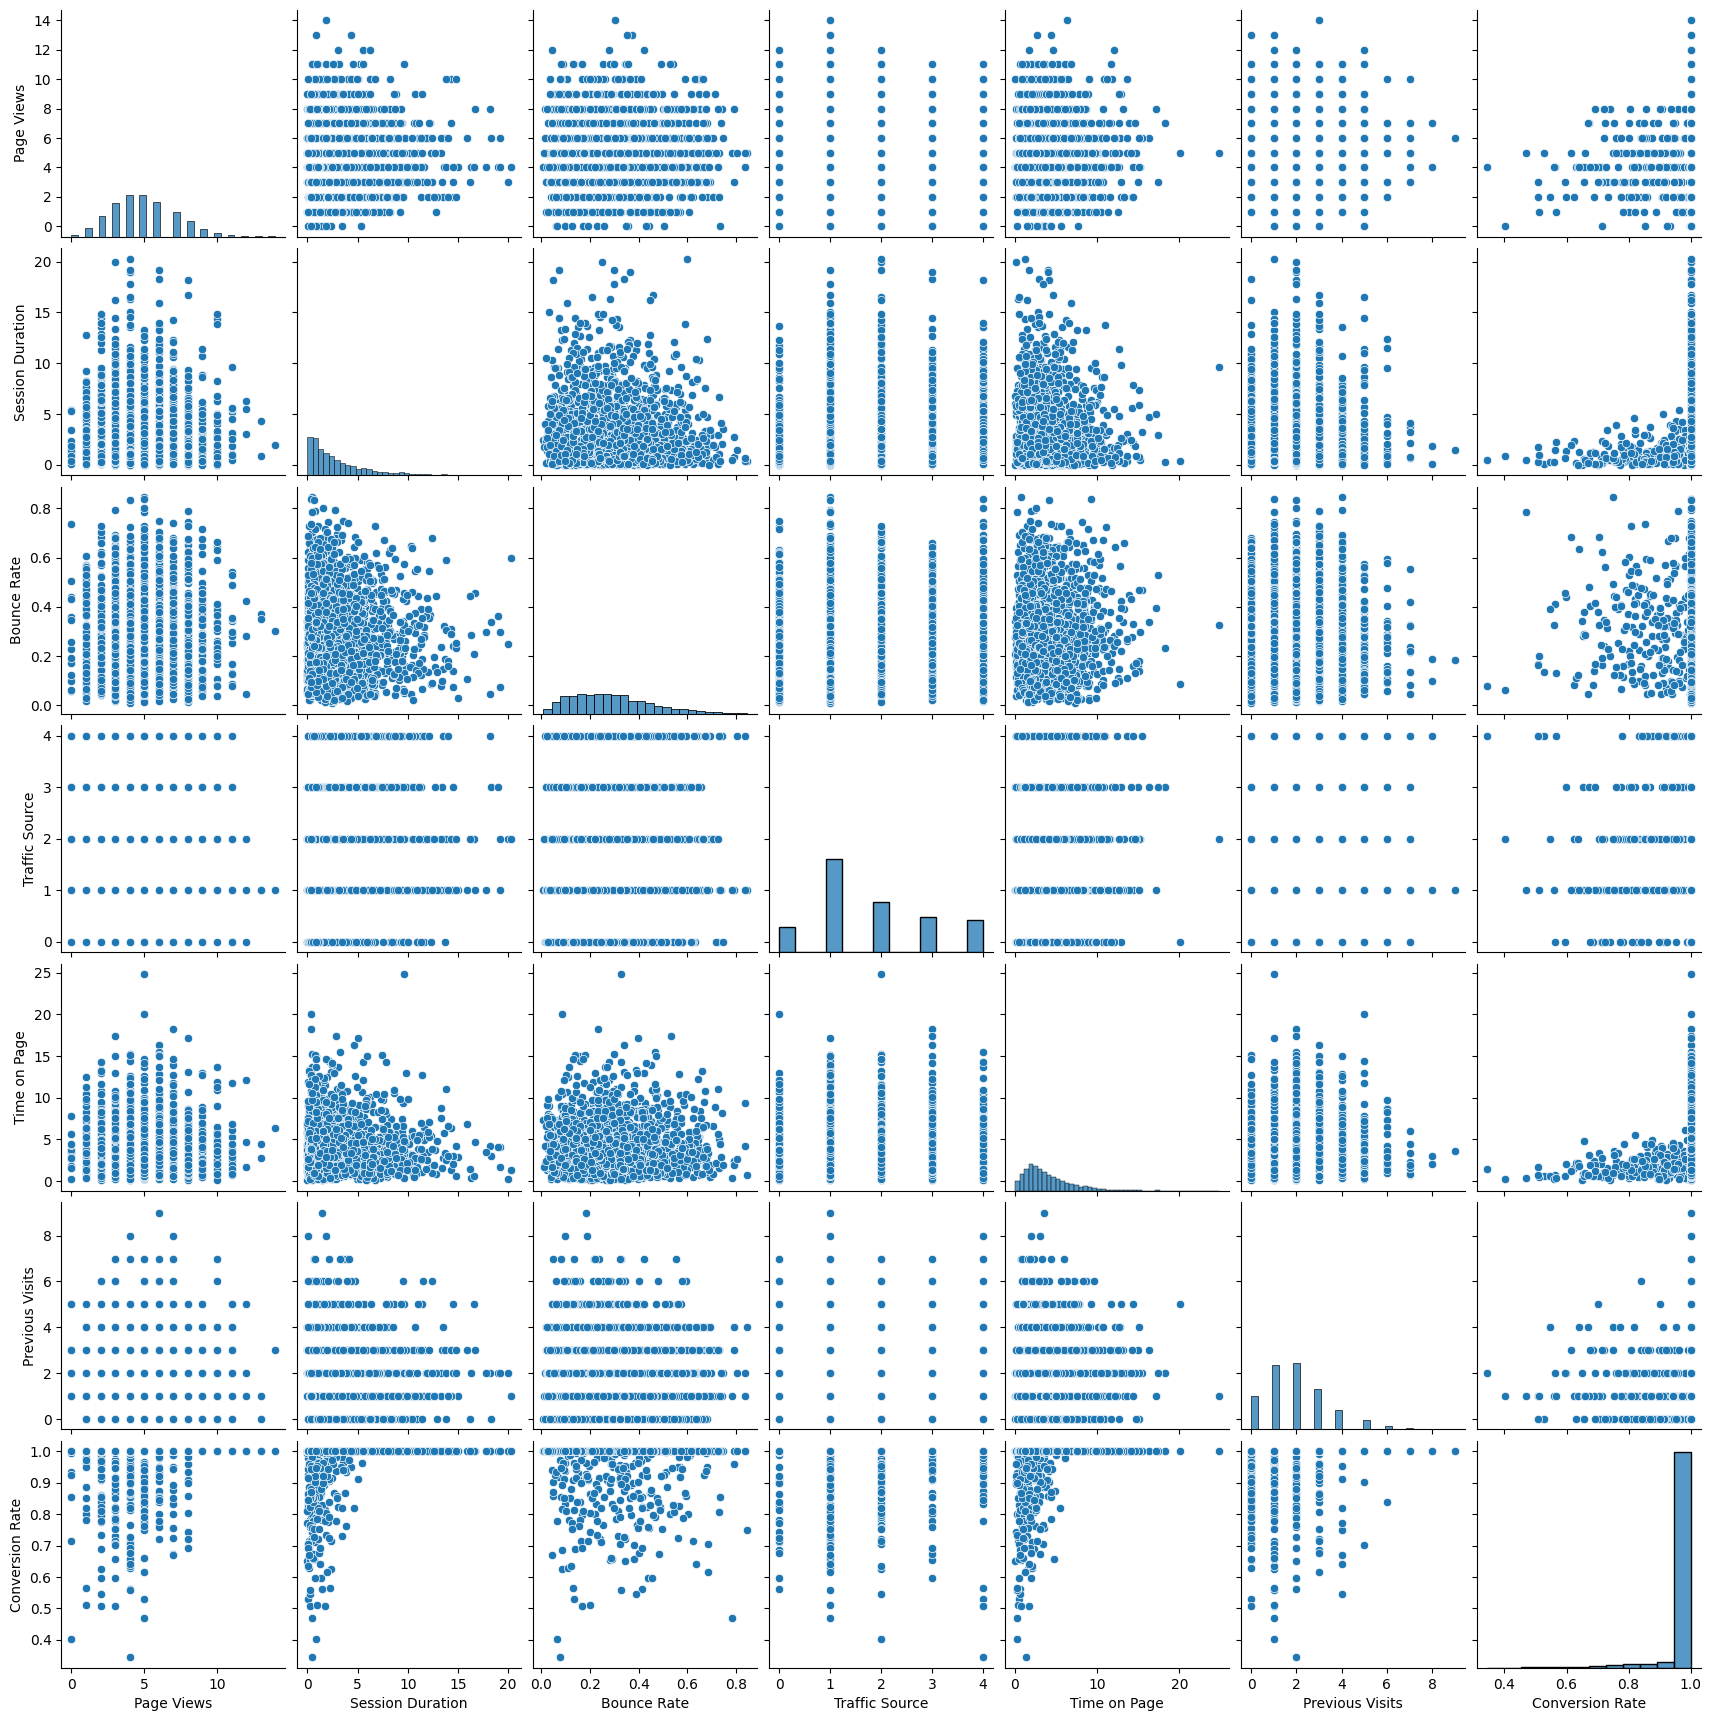

In [9]:
plt.figure(figsize=(25,10))
# sns.pairplot()
sns.pairplot(data)
plt.show()


corelation matrixes

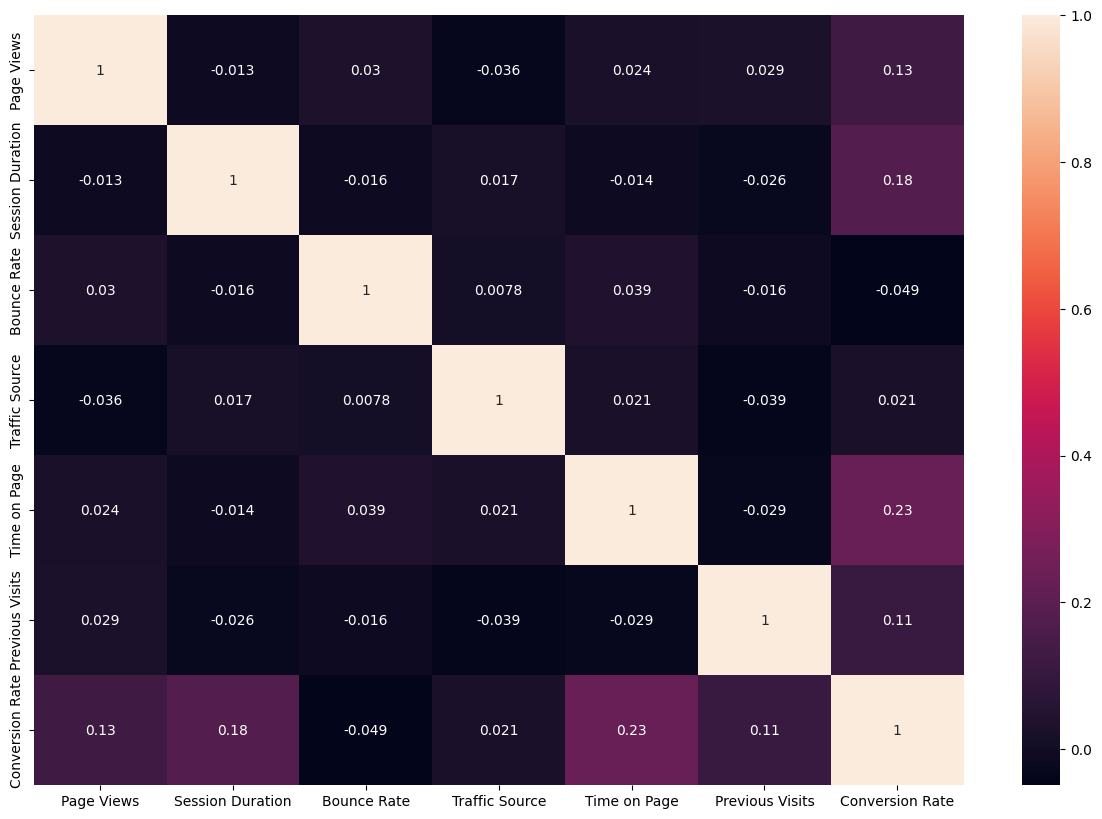

In [10]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

Discuss which variables appear to be the strongest predictors of Conversion Rate.
\

In [30]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X, y)
importance = model.feature_importances_
for i, v in enumerate(importance):
    print(f"Feature: {X.columns[i]}, Score: {v}")


Feature: Page Views, Score: 0.10899393640554388
Feature: Session Duration, Score: 0.2855756939281674
Feature: Bounce Rate, Score: 0.17241034082614498
Feature: Traffic Source, Score: 0.051833236385259
Feature: Time on Page, Score: 0.31252289341542505
Feature: Previous Visits, Score: 0.06866389903945973


Time on page is the most important predictor as it contributes to 30%

Multiple Linear Regression

Split the data into training (80%) and testing (20%) sets.

In [12]:
from sklearn import model_selection
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1600, 6)
(400, 6)
(1600,)
(400,)


Implement a Multiple Linear Regression model to predict Conversion Rate based on the independent variables.


In [13]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [14]:
y_pred=lr.predict(X_test)
predictions=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
predictions.head()

,Actual,Predicted
136,1.0,0.986198
1606,1.0,1.002525
943,1.0,0.969407
1327,1.0,1.000314
916,1.0,1.003398


Evaluate the model using the following metrics: Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), R-squared (R²), Adjusted R-squared (Adjusted R²)

In [29]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
adjusted_r2=1-(1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('Mean Absolute Error:',mae)
print('Mean Squared Error:',mse)
print('Root Mean Squared Error:',rmse)
print('R-squared:',r2)
print('Adjusted R-squared:',adjusted_r2)

Mean Absolute Error: 0.03628238174870054
Mean Squared Error: 0.005111854410377682
Root Mean Squared Error: 0.07149723358548694
R-squared: 0.1225934695704416
Adjusted R-squared: 0.1091979500218987


Transform the features to include polynomial terms (e.g., degree 2 or 3).

In [16]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=3)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)
print(X_train_poly.shape)
print(X_test_poly.shape)

(1600, 84)
(400, 84)


Implement a Polynomial Regression model using the transformed features.


In [17]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train_poly,y_train)

LinearRegression()

making predictions using test

In [18]:
y_pred_poly=lr.predict(X_test_poly)
# print(f'predictions :, {y_pred_poly}')

Evaluating the model using Metrics -MAE,MSE,RMSE & R2 using Polynomial Regression


---



In [28]:
mae_pred=mean_absolute_error(y_test,y_pred_poly)
mse_pred=mean_squared_error(y_test,y_pred_poly)
rmse_pred=np.sqrt(mse_pred)
r2_poly=r2_score(y_test,y_pred_poly)
adjusted_r2_poly=1-(1-r2_poly)*(len(y_test)-1)/(len(y_test)-X_test_poly.shape[1]-1)
print('Mean Absolute Error(MAE):',mae_pred)
print('Mean Squared Error(MSE):',mse_pred)
print('Root Mean Squared Error(RMSE):',rmse_pred)
print('R-squared:(R-Square)',r2_poly)
print('Adjusted R-squared:',adjusted_r2_poly)

Mean Absolute Error(MAE): 0.03176832907604449
Mean Squared Error(MSE): 0.003929591621849381
Root Mean Squared Error(RMSE): 0.06268645485150186
R-squared:(R-Square) 0.3255188676867684
Adjusted R-squared: 0.14565723240324002


Comparing performance of polynomial regression model with multiple linear Regression

polynomial Regression Metrics

Mean Absolute Error(MAE): 0.02943093022078571

Mean Squared Error(MSE): 0.0028323762738554047

Root Mean Squared Error(RMSE): 0.05322007397453901

R-squared:(R-Square) 0.28493961092769726

Adjusted R-squared: 0.23097278911091979

Multiple Linear Regression Metrics

Mean Absolute Error: 0.033174277215341254

Mean Squared Error: 0.003325086440483068

Root Mean Squared Error: 0.057663562502529

R-squared: 0.10161148423904542

Adjusted R-squared: 0.0878956290365881

Interpretation

Polynomial Regression is slightly better than Multiple Linear Regression in terms of MAE,MSE & RMSE.R Square and Adjusted R square is Triple with respect to Multiple Linear Regression.

Insights and Reporting


Plot the actual vs predicted values for both the multiple linear regression and polynomial regression models.


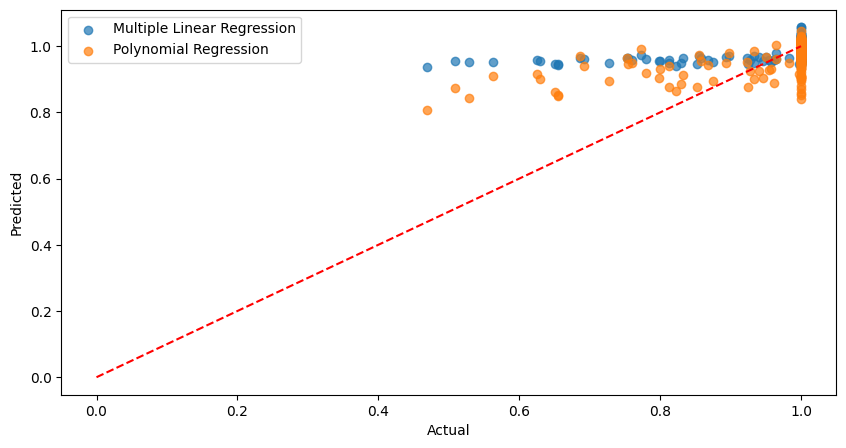

In [20]:
plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred,label='Multiple Linear Regression',alpha=0.7)
plt.scatter(y_test,y_pred_poly,label='Polynomial Regression',alpha=0.7)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

If polynomial regression shows better performance, plot the polynomial curve against the data points.


For Multiple linear Regression

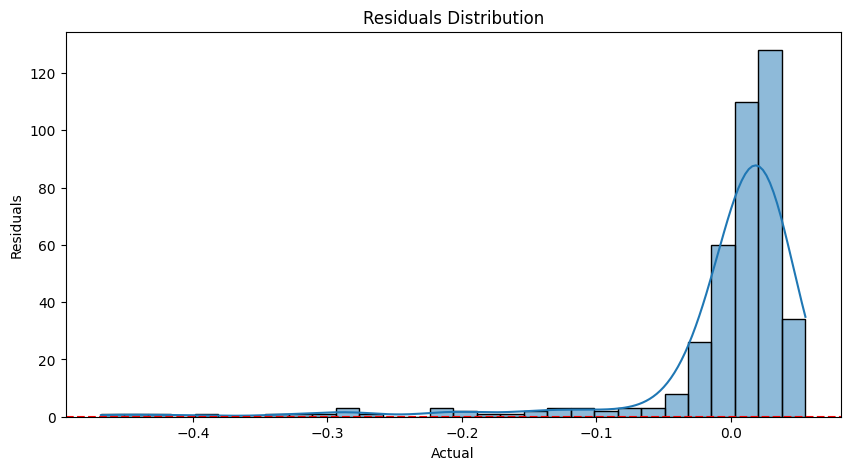

In [22]:
residuals = y_test - y_pred
plt.figure(figsize=(10,5))
sns.histplot(residuals,kde=True,bins=30)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Residuals')
plt.title('Residuals Distribution')
plt.show()

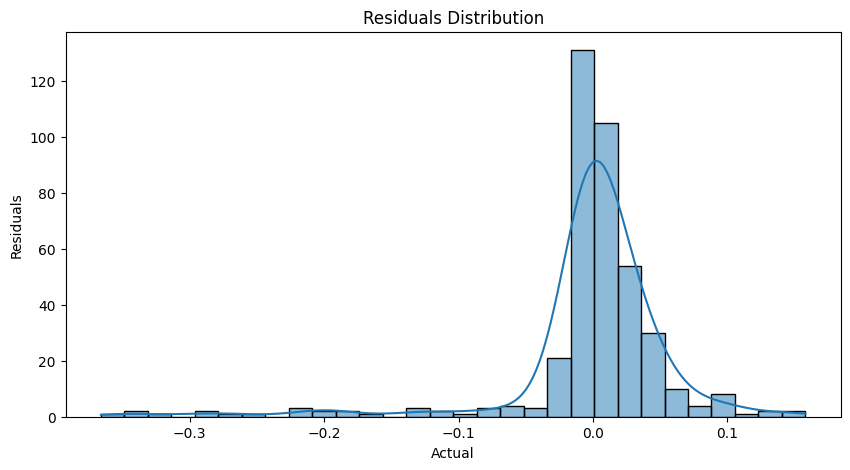

In [23]:
residuals = y_test - y_pred_poly
plt.figure(figsize=(10,5))
sns.histplot(residuals,kde=True,bins=30)
plt.xlabel('Actual')
plt.ylabel('Residuals')
plt.title('Residuals Distribution')
plt.show()

# If polynomial regression shows better performance, plot the polynomial curve against the data points.


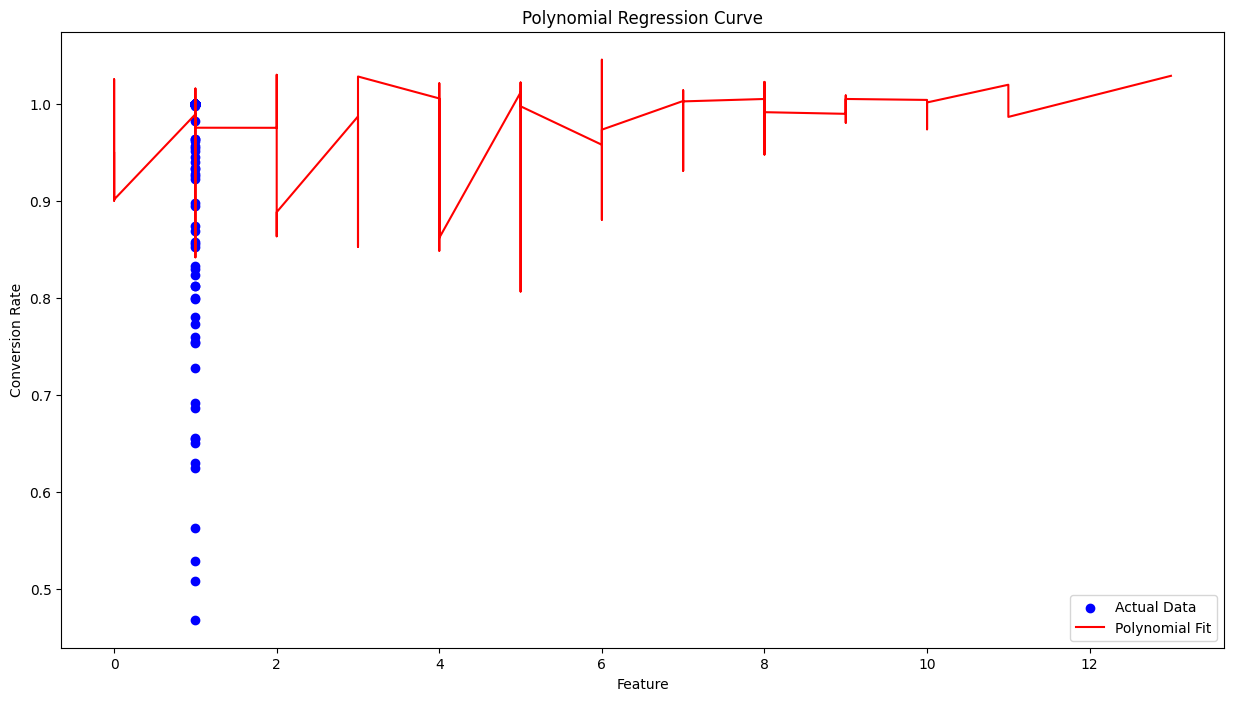

In [27]:
# Plotting the Polynomial Regression Curve
plt.figure(figsize=(15, 8))
# Accessing the first column using array indexing instead of .iloc
plt.scatter(X_test_poly[:, 0], y_test, color='blue', label='Actual Data')
sorted_indices = np.argsort(X_test.iloc[:, 0])
plt.plot(X_test.iloc[sorted_indices, 0], y_pred_poly[sorted_indices], color='red', label='Polynomial Fit')
plt.xlabel('Feature')
plt.ylabel('Conversion Rate')
plt.title('Polynomial Regression Curve')
plt.legend()
plt.show()

Conclusion

Multiple Linear Regression :The model shows average performance with R2 Score of 12.25%. where as with Polynomial Regression, it is about 32.5%.

Potential Improvements or Next Steps:

Feature Engineering: Explore additional features or transformations to improve model accuracy.

Regularization: Apply techniques like Ridge or Lasso regression to address overfitting in the Polynomial Regression model.

Model Evaluation: Test different degrees of polynomial features and evaluate their impact on model performance.

Cross-Validation: Use cross-validation techniques to get a better estimate of model performance and avoid overfitting.